In [1]:
from __future__ import absolute_import, division, print_function

from sys import stdout

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

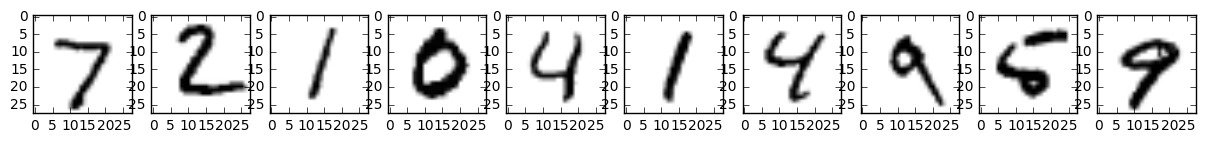

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tensorflow as tf

In [7]:
# Set parameters
learning_rate = 0.01
training_iteration = 5
batch_size = 250
print_freq=1

In [8]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1, mean=0.0) #tf.constant(0.0, shape=shape)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [9]:
# TF graph input
x = tf.placeholder('float', [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition => 10 classes

#dropout rate = 1 - keep_rate
keep_rate = tf.placeholder(tf.float32)

In [10]:
with tf.name_scope("reshape_0") as scope:
    input_x = tf.reshape(x, [-1, 28, 28, 1])

In [11]:
# keras model for reference

# model = Sequential()
# model.add(Reshape(input_shape, input_shape=(784,)))

# model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
# model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())
# model.add(Dropout(0.25))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))

# model.add(Dense(10, activation='softmax'))

In [12]:
with tf.name_scope("conv_1") as scope:
    
    #filter definition
    f_1 = weight_variable([3, 3, 1, 32])
    b_1 = bias_variable([32])
    
    # Construct a dense linear model, with act=relu and dropout
    layer_1 = tf.nn.relu(tf.nn.conv2d(input=input_x, filter=f_1, strides=[1,1,1,1], padding='SAME') + b_1)    

In [13]:
with tf.name_scope("conv_2") as scope:
    
    #filter definition
    f_2 = weight_variable([3, 3, 32, 32])
    b_2 = bias_variable([32])
    
    # Construct a dense linear model, with act=relu and dropout
    layer_2 = tf.nn.relu(tf.nn.conv2d(input=layer_1, filter=f_2, strides=[1,1,1,1], padding='SAME') + b_2)

In [14]:
with tf.name_scope("maxpool_3") as scope:
    # maxpool strides of 2, size of pool is 2x2
    layer_3 = tf.nn.max_pool(value=layer_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [15]:
with tf.name_scope("conv_4") as scope:
    
    #filter definition
    f_4 = weight_variable([3, 3, 32, 64])
    b_4 = bias_variable([64])
    
    # Construct a dense linear model, with act=relu and dropout
    layer_4 = tf.nn.relu(tf.nn.conv2d(input=layer_3, filter=f_4, strides=[1,1,1,1], padding='SAME') + b_4)

In [16]:
with tf.name_scope("conv_5") as scope:
    
    #filter definition
    f_5 = weight_variable([3, 3, 64, 64])
    b_5 = bias_variable([64])
    
    # Construct a dense linear model, with act=relu and dropout
    layer_5 = tf.nn.relu(tf.nn.conv2d(input=layer_4, filter=f_5, strides=[1,1,1,1], padding='SAME') + b_5)

In [17]:
with tf.name_scope("maxpool_6") as scope:
    # maxpool strides of 2, size of pool is 2x2
    layer_6 = tf.nn.max_pool(value=layer_5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [18]:
with tf.name_scope("flatten_7") as scope:
    layer_7 = tf.reshape(layer_6, [-1, 7*7*64])    

In [19]:
with tf.name_scope("dropout_8") as scope:
    layer_8 = tf.nn.dropout(layer_7, keep_rate)

In [20]:
with tf.name_scope("dense_9") as scope:

    # Set model weights
    W_9 = weight_variable([7*7*64, 256])
    b_9 = bias_variable([256])

    # Construct a dense linear model, with act=relu and dropout
    layer_9 = tf.nn.relu(tf.matmul(layer_8, W_9) + b_9)

In [21]:
with tf.name_scope("dropout_10") as scope:
    layer_10 = tf.nn.dropout(layer_9, keep_rate)

In [22]:
with tf.name_scope("dense_11") as scope:

    # Set model weights
    W_11 = weight_variable([256, 10])
    b_11 = bias_variable([10])

    # Construct a dense linear model, with act=relu and dropout
    layer_11 = tf.matmul(layer_10, W_11) + b_11

In [23]:
# get the softmax as a separate tensorflow op
pred = tf.nn.softmax(layer_11)

# softmax cross entropy descend on y_hat
y_hat = layer_11

# More name scopes will clean up graph representation
with tf.name_scope("cost_function") as scope:
    # Minimize error using cross entropy
    # Cross entropy
    cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat,y))
    
    # Create a summary to monitor the cost function
    tf.scalar_summary("cost_function", cost_function)

In [24]:
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_function)

In [25]:
predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(predictions, "float"))

In [26]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.merge_all_summaries()

In [27]:
# Launch the graph
sess = tf.InteractiveSession()

# Logs and graph for tensorboard
summary_writer = tf.train.SummaryWriter('./tensorboard', graph=sess.graph)

# Init the session
sess.run(init)

In [28]:
# Training cycle
for iteration in range(training_iteration):
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    avg_loss =0.
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        # dropout placeholder
        batch_kr = 0.75
        
        # Fit training using batch data
        loss, accuracy, optm = sess.run([cost_function,acc,optimizer], 
            feed_dict={x: batch_xs, keep_rate: batch_kr, y: batch_ys})
        
        avg_loss += loss
        
        stdout.write('\r{}/{} avg_cost:{:6f} cost:{:6f} acc:{:6f}'.format(i*batch_size, 
                                                                  mnist.train.num_examples, 
                                                                  avg_loss/(i+1), 
                                                                  loss, accuracy))
        stdout.flush() 
            
    # Display logs per iteration step
    if iteration % print_freq ==0 :
        accuracy_test = sess.run([acc], feed_dict={x: mnist.test.images, keep_rate: 1.0, y: mnist.test.labels})
        print(" epoch: {:02d} acc_test={:.9f}".format(iteration, accuracy_test[0]))


54750/55000 avg_cost:1.134234 cost:0.255462 acc:0.932000 epoch: 00 acc_test=0.957000017
54750/55000 avg_cost:0.190991 cost:0.209424 acc:0.932000 epoch: 01 acc_test=0.978200018
54750/55000 avg_cost:0.142294 cost:0.154328 acc:0.956000 epoch: 02 acc_test=0.982299984
54750/55000 avg_cost:0.118072 cost:0.100645 acc:0.968000 epoch: 03 acc_test=0.982400000
54750/55000 avg_cost:0.100351 cost:0.077021 acc:0.976000 epoch: 04 acc_test=0.984600008


In [29]:
print("Accuracy:", acc.eval({x: mnist.test.images, keep_rate:1.0, y: mnist.test.labels}))

Accuracy: 0.9846


In [30]:
# test item #100 is a six
pixels = mnist.test.images[100]

#predict
result = sess.run(pred, feed_dict={x:[pixels], keep_rate:1.0})
dict(zip(range(10), result[0]))

{0: 1.7780995e-06,
 1: 2.2664248e-10,
 2: 2.7280639e-10,
 3: 6.025768e-12,
 4: 2.8735853e-05,
 5: 2.6110259e-08,
 6: 0.99996948,
 7: 8.1585572e-12,
 8: 2.0939167e-08,
 9: 2.8137186e-09}

In [31]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

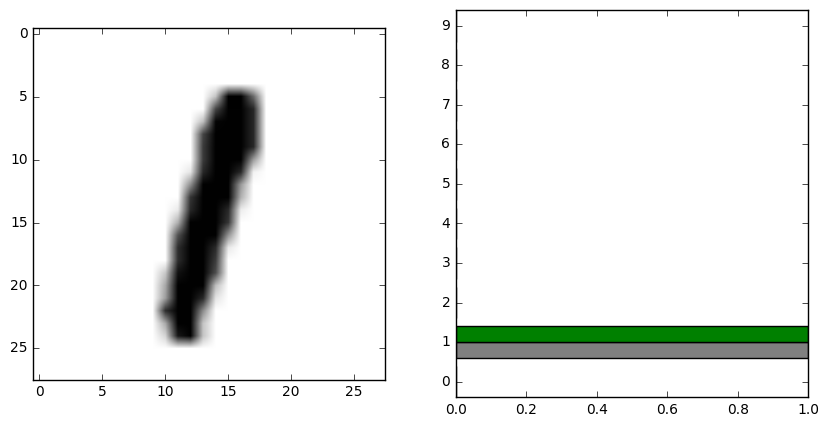

In [32]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = sess.run(pred, feed_dict={x:[pixels], keep_rate:1.0})[0]

test_render(pixels, result, truth)

In [33]:
### What went wrong?
pixels = mnist.test.images
truth = mnist.test.labels

feed_dict = {x:pixels,keep_rate:1.0}
result = sess.run(pred, feed_dict=feed_dict)

In [34]:
index_correct = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(index_correct==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 154


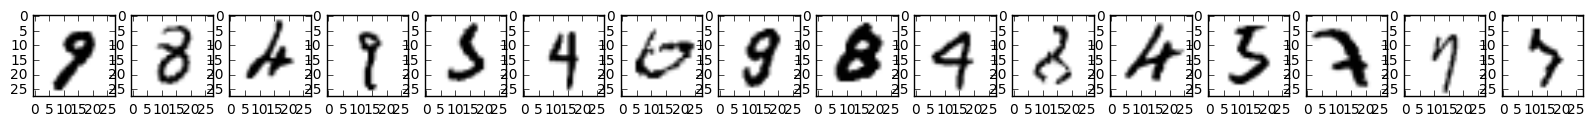

In [35]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()

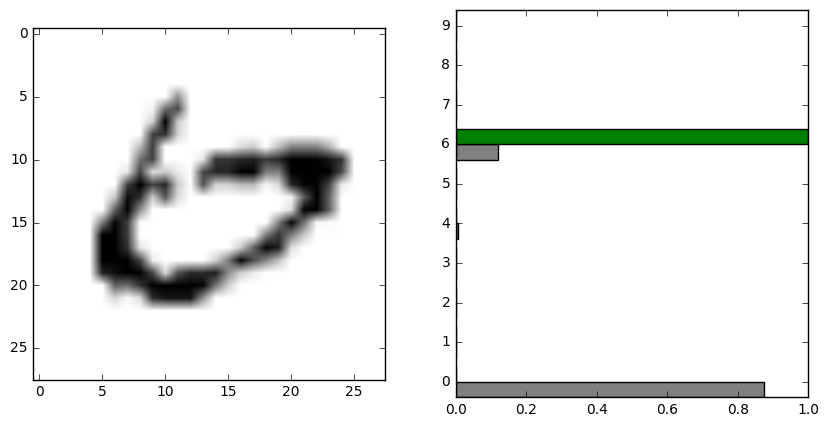

In [36]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]

feed_dict = {x:[pixels]}
feed_dict.update({keep_rate:1.0})
result = sess.run(pred, feed_dict=feed_dict)[0]

test_render(pixels, result, truth)

In [37]:
# Close the Session when we're done.
# sess.close()